### INQBATOR ASSIGNMENT

In [25]:
#  importing the libraries
import pandas as pd
import re
import matplotlib as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
# Load the dataset using Pandas
df = pd.read_csv('barterdata.csv')  # Replace 'your_dataset.csv' with the actual dataset file path
df.head()

,Title Name,View Count,Like Count,Tags,Category
0,Visual identity. Branding.,6845,933,"Logo', 'Package', 'Motion Graphics', 'Product'...",Environmental Design
1,Thomas Edisons Invention Factory,5997,224,"Comic Book', 'Character', 'Poster', 'Illustrat...",Logo Design
2,Hellorep.ai onboarding experience,1510,1080,"Web Design', 'Character', 'Magazine', 'Motion ...",Vehicle Wrap Design
3,3D Composition,739,930,"Illustration', 'Package', 'Character', 'Magazi...",Brand Identity Design
4,3D Composition,4647,384,"Comic Book', 'Typography', 'Web Design', 'Maga...",Illustration


In [27]:
df.shape

(10000, 5)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title Name  10000 non-null  object
 1   View Count  10000 non-null  int64 
 2   Like Count  10000 non-null  int64 
 3   Tags        10000 non-null  object
 4   Category    10000 non-null  object
dtypes: int64(2), object(3)
memory usage: 390.8+ KB


In [29]:
df.describe()

,View Count,Like Count
count,10000.000000,10000.000000
mean,5071.065400,1016.564300
std,2866.248411,579.025645
min,100.000000,10.000000
25%,2573.750000,523.000000
50%,5098.500000,1024.000000
75%,7556.250000,1522.000000
max,9999.000000,2000.000000


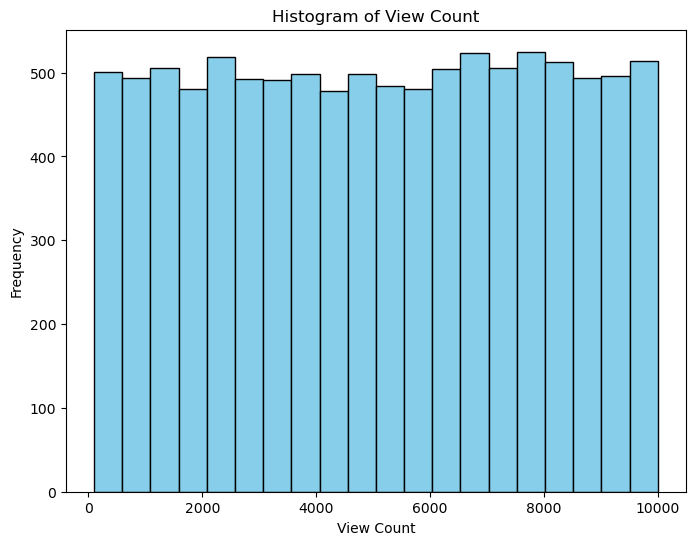

In [30]:
import matplotlib.pyplot as plt

# Create a histogram of View Count
plt.figure(figsize=(8, 6))
plt.hist(df['View Count'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.title('Histogram of View Count')
plt.show()

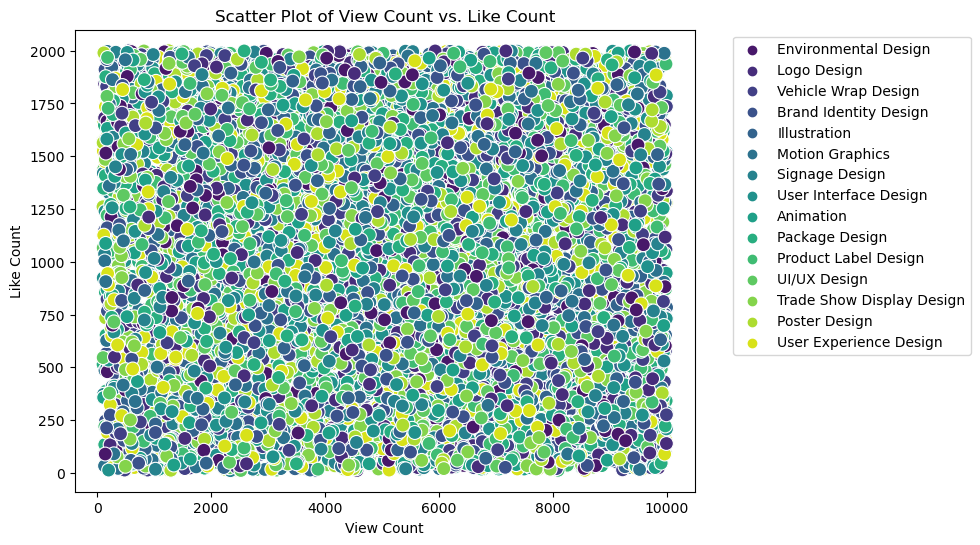

In [31]:
import seaborn as sns

# Create a scatter plot of View Count vs. Like Count
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='View Count', y='Like Count', hue='Category', palette='viridis', s=100)
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.title('Scatter Plot of View Count vs. Like Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_15556\884038322.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


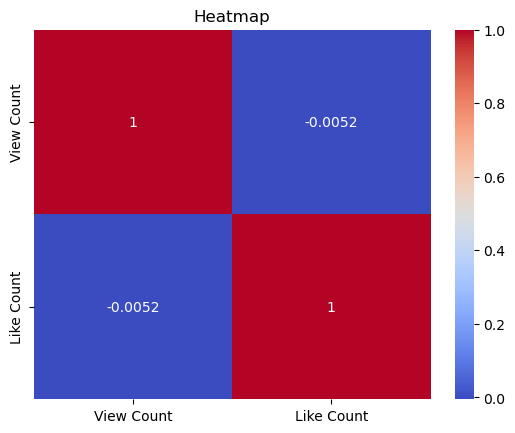

In [32]:
import seaborn as sns

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

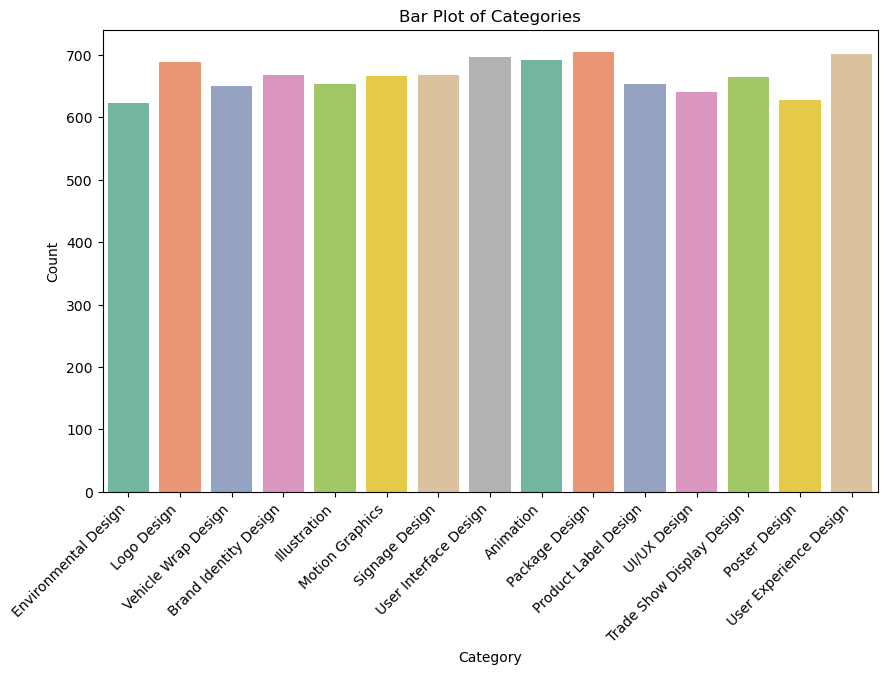

In [22]:
# Create a bar plot of Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', palette='Set2')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot of Categories')
plt.xticks(rotation=45, ha='right')
plt.show()


In [35]:
# Data Cleaning and Preprocessing
def clean_text(text):
    # Remove special characters, HTML tags, punctuation, and irrelevant symbols
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters and punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace and strip
    return text
# Apply text cleaning to the 'Title' column
df['Title Name'] = df['Title Name'].apply(clean_text)

# Tokenize the text into individual words
df['Tokenized_Title'] = df['Title Name'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Filtered_Title'] = df['Tokenized_Title'].apply(lambda tokens: [word.lower() for word in tokens if word.lower() not in stop_words])

# Convert all text to lowercase
df['Cleaned_Title'] = df['Filtered_Title'].apply(lambda tokens: ' '.join(tokens))

# Print the cleaned dataset
print(df[['Title Name', 'Cleaned_Title']].head())

                         Title Name                     Cleaned_Title
0          Visual identity Branding          visual identity branding
1  Thomas Edisons Invention Factory  thomas edisons invention factory
2  Hellorepai onboarding experience  hellorepai onboarding experience
3                    3D Composition                    3d composition
4                    3D Composition                    3d composition


In [36]:
# Transform text data into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Title'])


In [37]:

# Calculate cosine similarity
def get_recommendations(input_title, tfidf_matrix, df, top_n=5):
    input_vector = tfidf_vectorizer.transform([input_title])
    cosine_similarities = cosine_similarity(input_vector, tfidf_matrix)
    sim_scores = list(enumerate(cosine_similarities[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in sim_scores[1:top_n + 1]]
    top_recommendations = df.iloc[top_indices]['Title Name']
    return top_recommendations

# Example: Get recommendations for a given input title

input_title = input("Enter Your input title here: ")
recommendations = get_recommendations(input_title, tfidf_matrix, df)
print(recommendations)

# You can use the 'get_recommendations' function to get recommendations for any input title.


Enter Your input title here: branding
17    Letterco Branding
26    Letterco Branding
42    Letterco Branding
53    Letterco Branding
59    Letterco Branding
Name: Title Name, dtype: object
